
### Part 1 - Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 
import json
import datetime
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df_login=pd.read_json("logins.json")

In [3]:
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_login=df_login.set_index(['login_time'])

In [5]:
df_login.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [6]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [7]:
df_login['Login_count']=0
#df_login.drop('set_count',axis=1,inplace=True)


In [8]:
df_login.head()

,Login_count
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,0
1970-01-01 20:16:37,0
1970-01-01 20:16:36,0
1970-01-01 20:26:21,0


In [9]:
# resample 15 minutes and perform aggregation function-count

df_login_15=df_login.resample(rule='15T').count()

# create a column day of week 
df_login_15['day_of_week']=df_login_15.index.dayofweek

# create dictionary for days of week
d_of_wk={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday", 4:"Friday",5:"Saturday",6:"Sunday"}

In [10]:
# apply lambda function to map days of week 
df_login_15['day_of_week']= df_login_15['day_of_week'].apply(lambda x: d_of_wk[x])

In [11]:
df_login_15.head()

,Login_count,day_of_week
login_time,,
1970-01-01 20:00:00,2,Thursday
1970-01-01 20:15:00,6,Thursday
1970-01-01 20:30:00,9,Thursday
1970-01-01 20:45:00,7,Thursday
1970-01-01 21:00:00,1,Thursday


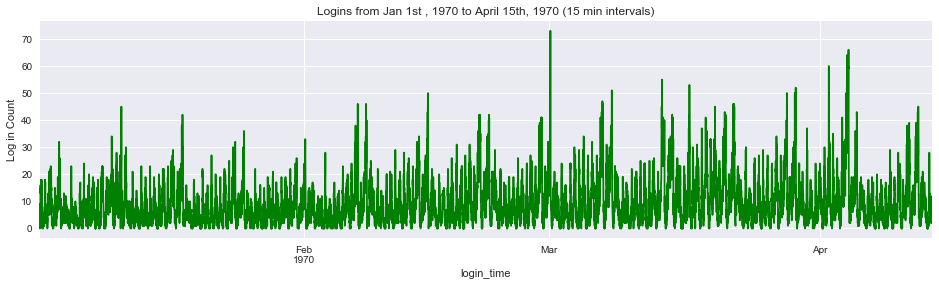

In [12]:
ax=df_login_15['Login_count'].plot(figsize=(16,4),color='green')
ax.autoscale(enable=True,axis='x', tight=True)
ax.set_ylabel('Log in Count')
ax.set_title('Logins from Jan 1st , 1970 to April 15th, 1970 (15 min intervals)');



In [13]:
df_login_15.index.min()

Timestamp('1970-01-01 20:00:00')

In [14]:
df_login_15.index.max()

Timestamp('1970-04-13 18:45:00')

In [15]:
logins = pd.read_json('logins.json')

In [16]:
##logins.head()

In [17]:
# check for null values
logins.isnull().sum()

login_time    0
dtype: int64

In [18]:
#logins.info()

In [19]:

#logins['rounded'] = logins['login_time'].dt.round('15min')
#logins['year'] = logins['login_time'].dt.to_period('Y')
#grouped = logins.groupby(['rounded']).count()

#plt.plot(grouped)
#plt.ylabel('Number of logins')
#plt.xlabel('Time')
#plt.tick_params(labelrotation = 35)
#plt.title('Logins from Jan 1st, 1970 to April 15th, 1970 (15 min intervals)')
#plt.show()

In [20]:
df_login_15_month=df_login.resample(rule='15T').count()
df_login_15_month['Month']=df_login_15.index.month
df_login_15_month['Month']=df_login_15_month.index.strftime("%B")

In [21]:
df_login_15_month.head()

,Login_count,Month
login_time,,
1970-01-01 20:00:00,2,January
1970-01-01 20:15:00,6,January
1970-01-01 20:30:00,9,January
1970-01-01 20:45:00,7,January
1970-01-01 21:00:00,1,January


In [22]:
jan=df_login_15_month[df_login_15_month.Month=='January']

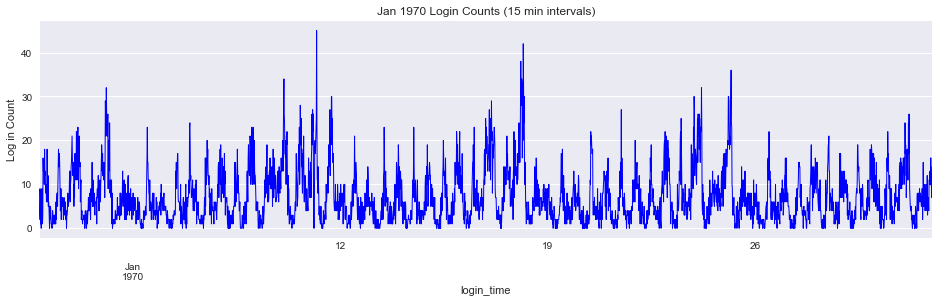

In [23]:
ax=jan['Login_count'].plot(figsize=(16,4),color='blue',lw='1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel('Log in Count')
ax.set_title('Jan 1970 Login Counts (15 min intervals)');

In [24]:
feb=df_login_15_month[df_login_15_month.Month=='February']


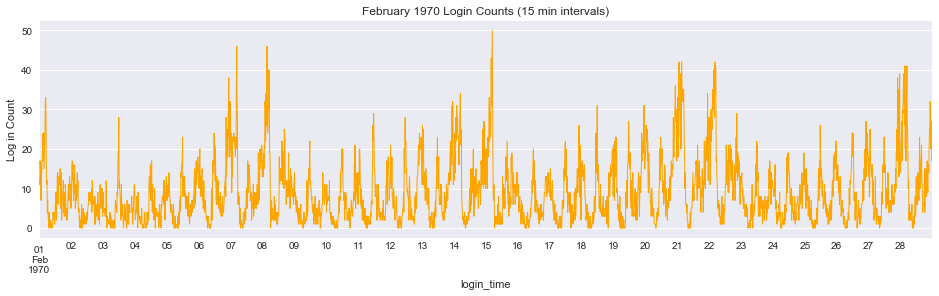

In [25]:
ax=feb['Login_count'].plot(figsize=(16,4),color='orange',lw='1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel('Log in Count')
ax.set_title('February 1970 Login Counts (15 min intervals)');

In [26]:
df_login_15.head()
len(df_login_15)

9788

In [27]:
wk_grp=df_login_15.groupby('day_of_week').agg(['count'])

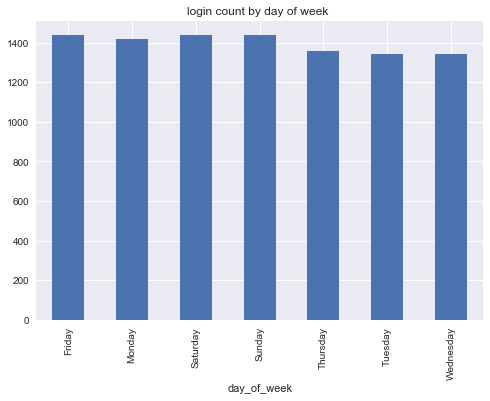

In [29]:
wk_grp.plot.bar(stacked=False)
plt.title('login count by day of week ')
plt.legend([]);

In [30]:
Month_grp=df_login_15_month.groupby('Month').agg(['count'])

In [31]:
Month_grp

,Login_count
,count
Month,
April,1228
February,2688
January,2896
March,2976


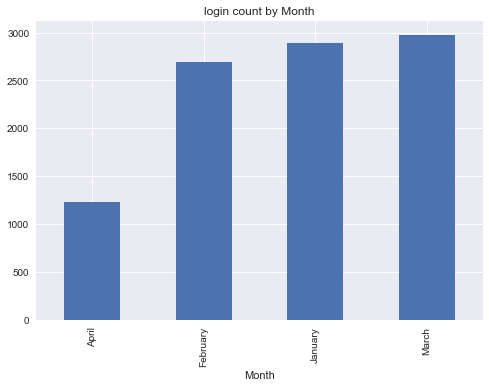

In [37]:
ax=Month_grp.plot.bar()
ax.set_title('login count by Month')
ax.legend([]);

In [38]:
df_login_15_hrs=df_login.resample(rule='15T').count()
df_login_15_hrs['HRS_24']=df_login_15_hrs.index.hour

In [39]:
df_login_15_hrs.head()

,Login_count,HRS_24
login_time,,
1970-01-01 20:00:00,2,20
1970-01-01 20:15:00,6,20
1970-01-01 20:30:00,9,20
1970-01-01 20:45:00,7,20
1970-01-01 21:00:00,1,21


In [40]:
df_login_15_hrs.groupby('HRS_24').agg('mean')

,Login_count
HRS_24,
0,14.688725
1,15.482843
2,14.215686
3,11.840686
4,12.338235
5,7.218137
6,2.789216
7,1.997549
8,2.004902


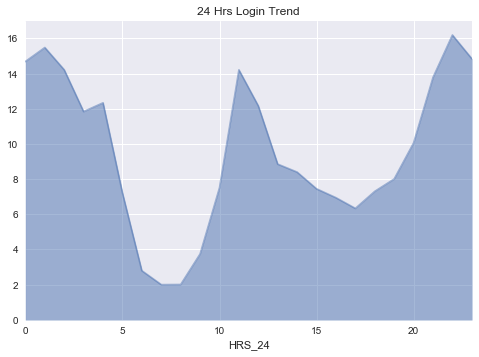

In [42]:
df_login_15_hrs.groupby('HRS_24').agg('mean').plot.area(stacked=False,alpha=0.5)
plt.title('24 Hrs Login Trend')
plt.legend([]);

In [81]:
df_login_15_hrs.groupby('HRS_24').agg('mean').min()

Login_count    1.997549
dtype: float64

In [82]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday']

In [83]:
weekends=['Saturday','Sunday']

In [84]:
Sat=df_login_15.day_of_week=='Saturday'
Sun=df_login_15.day_of_week=='Sunday'


In [85]:
Weekend_logins=df_login_15[Sat | Sun]

In [86]:
Weekend_logins.describe()

,Login_count
count,2880.000000
mean,13.036111
std,10.232454
min,0.000000
25%,5.000000
50%,11.000000
75%,18.000000
max,73.000000


In [87]:
Weekend_logins.head()

,Login_count,day_of_week
login_time,,
1970-01-03 00:00:00,5,Saturday
1970-01-03 00:15:00,10,Saturday
1970-01-03 00:30:00,7,Saturday
1970-01-03 00:45:00,17,Saturday
1970-01-03 01:00:00,13,Saturday


In [90]:
Weekend_hr_analysis= Weekend_logins.copy()
Weekend_hr_analysis['HRS']=Weekend_logins.index.hour
Weekend_hr_analysis.head()
#Weekend_hr_analysis.drop('HRS_24',axis=1,inplace=True)
Weekend_hr_analysis['HRS']=Weekend_hr_analysis.index.strftime('%H')
Weekend_hr_analysis.groupby('HRS').mean()

,Login_count
HRS,
00,19.808333
01,24.308333
02,26.800000
03,26.841667
04,31.883333
05,18.291667
06,6.583333
07,3.083333
08,2.333333


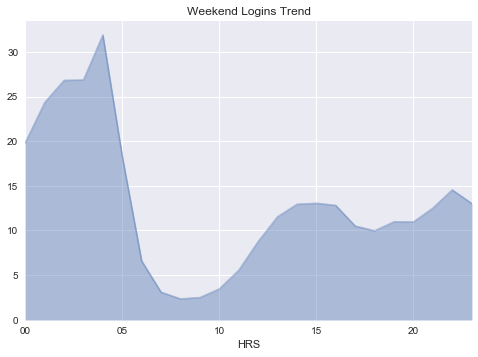

In [92]:
Weekend_hr_analysis.groupby('HRS').mean().plot.area(stacked=False,alpha=0.4)
plt.title('Weekend Logins Trend')
plt.legend([]);

In [93]:
wk_day=df_login_15['day_of_week'].isin(weekdays)
wk_day_analysis=df_login_15[wk_day]
wk_day_analysis=wk_day_analysis.copy()
wk_day_analysis['HRS']=wk_day_analysis.index.hour
wk_day_analysis['HRS']=wk_day_analysis.index.strftime("%H")
wk_day_analysis.head()

,Login_count,day_of_week,HRS
login_time,,,
1970-01-01 20:00:00,2,Thursday,20
1970-01-01 20:15:00,6,Thursday,20
1970-01-01 20:30:00,9,Thursday,20
1970-01-01 20:45:00,7,Thursday,20
1970-01-01 21:00:00,1,Thursday,21


In [50]:
wk_day_analysis.groupby('HRS').mean()

,Login_count
HRS,
00,12.555556
01,11.805556
02,8.972222
03,5.590278
04,4.194444
05,2.604167
06,1.208333
07,1.545139
08,1.868056


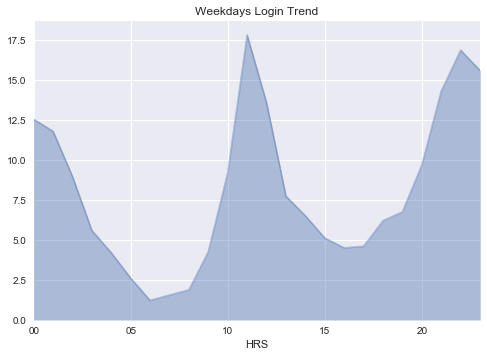

In [94]:
wk_day_analysis.groupby('HRS').mean().plot.area(stacked=False,alpha=0.4)
plt.title('Weekdays Login Trend')
plt.legend([]);

In [52]:
wk_day_analysis.groupby('day_of_week').mean()

,Login_count
day_of_week,
Friday,10.561111
Monday,6.213380
Thursday,8.794118
Tuesday,6.895833
Wednesday,7.692708


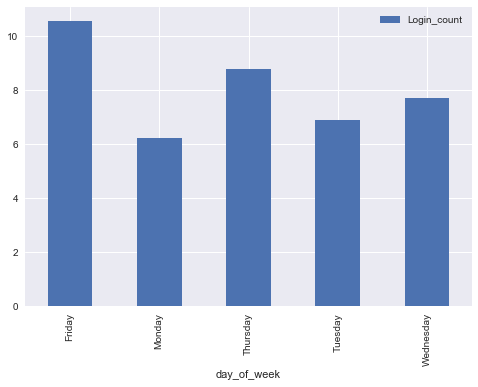

In [53]:
wk_day_analysis.groupby('day_of_week').mean().plot.bar()

### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**Q: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

The metrics that would contribute significantly to measure the success of this experiment are:

-	Number of trips between cities Gotham and Metreopolis compared to previous data. This will give us the clear figures compared to the old data if the number of trips between the cities increases or decreases

-	 Number of cancellations of the trip between cities compared to previous data. This gives us a clear understanding if the experiment is encouraging drivers enough to travel to other cities.

-	Number of the valid reimbursement requested by the drivers and compare it with the active number of drivers in that period. Success rate depends on the reimbursement number. We need to look for increase in trips between this two cities vs previous data. And decrease in cancellation by drivers for the trips between this two cities vs previous data. 


**Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**
**a. how you will implement the experiment**
Data must first be produced which can identify which drivers are operating in both cities. This is not evident from the present ultimate_challenge.json file. However, since the file given to me contains aggregate datapoints for each driver, there must be trip-level data stored somewhere in the Ultimate Technologies database. I would discuss obtaining this data with their IT department.

If there are no existing data to identify current usage of the toll bridge, I would recommend that the experiment be delayed until sufficient data exists as a control set, or until a cutoff date that can be specified by management. I would also advocate that during the policy change, every driver must acknowledge the new procedure (conveniently through a google form or their app) to ensure compliance and adoption of the policy.

Whether the drivers crossed the bridge or not needs to be represented in the next version of the ultimate_challenge.json file, which I could obtain from the company's SQL database.

**b. what statistical test(s) you will conduct to verify the significance of the observation
After another data collection period, I would evaluate the change by performing a one-tailed hypothesis test using a Z statistic and an alpha value of 0.05. The results would argue for or against the proportion changing concurrently with the policy.**

I could also run a bootstrap test, randomly generating samples of 10,000 drivers and detemining the distribution of sample proportions after the policy change. This can be compared to the distribution of drivers before the policy change to see if it is comparable. That is, do the proportion of drivers in the pre-policy data fall in the bottom 2.5% of bootstrap sample proportions?

**c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
If the statistical tests suggest significant changes concurrent with policy change, I would suggest that the data supports their objective... more dirvers are traveling between the two cities.**

I would also discuss the results with the accounting branch of the company, to determine the cost of the policy and to uncover any changes in revenue in this time period. If there were, I would see if they correlate with any increased avg_dist, surge_pct, and avg_serge, aggregated by date. Closing the loop and documenting increased revenue is essential, and I would gladly provide the analysis if it isn't already being handled in accounting.

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

**Data description**

  - city: city this user signed up in
  - phone: primary device for this user
  - signup_date: date of account registration; in the form ‘YYYY MM DD’
  - last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
  - avg_dist: the average distance in miles per trip taken in the first 30 days after signup
  - avg_rating_by_driver: the rider’s average rating over all of their trips
  - avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
  - surge_pct: the percent of trips taken with surge multiplier > 1
  - avg_surge: The average surge multiplier over all of this user’s trips
  - trips_in_first_30_days: the number of trips this user took in the first 30 days after
     signing up
  - ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
    FALSE otherwise
  - weekday_pct: the percent of the user’s trips occurring during a weekday

In [54]:

# import libraries
import json
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [55]:

# load json file into dataframe
with open('ultimate_data_challenge.json') as file:
    ultimate = json.load(file)
    
ultimate_df = pd.DataFrame(ultimate)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [56]:
# parse datetime columns
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df.last_trip_date, infer_datetime_format=True)
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df.signup_date, infer_datetime_format=True)

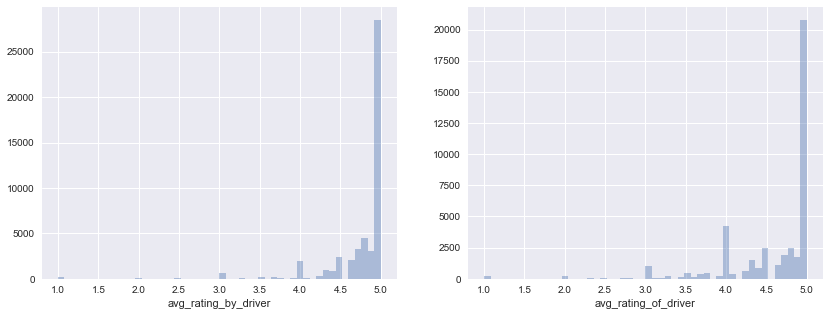

In [57]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.distplot(ultimate_df.avg_rating_by_driver.dropna(), kde=False, ax=ax[0])
sns.distplot(ultimate_df.avg_rating_of_driver.dropna(), kde=False, ax=ax[1]);

In [58]:
# fill missing average ratings with median value
ultimate_df.avg_rating_by_driver.fillna(ultimate_df.avg_rating_by_driver.median(), inplace=True)
ultimate_df.avg_rating_of_driver.fillna(ultimate_df.avg_rating_of_driver.median(), inplace=True)

#fill missing phone with 'unknown'
ultimate_df.phone.fillna('unknown', inplace=True)

In [59]:

# convert city and phone columns to categorical
ultimate_df.city = ultimate_df.city.astype('category')
ultimate_df.phone =  ultimate_df.phone.astype('category')

In [60]:

ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.6 MB


In [61]:
def set_active_status(df, last_active):
    '''
    A function to create a column indicating the active
    status of a user in the last 30 days.
    1 = active, 0 = inactive
    
    last_active = column containing users last active date
    '''
    # set date that data was pulled
    pull_date = df[last_active].max()
    
    # create column to define users active in last 30 day
    for i in range(len(df)):
        diff = (pull_date - df.loc[i, last_active]).days
        if diff <= 30:
            df.loc[i, 'active'] = 1
        else:
            df.loc[i, 'active'] = 0
    
    # set dtype to integer
    df.active = df.active.astype(int)
        
set_active_status(ultimate_df, 'last_trip_date')

In [62]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [63]:
# convert signup_date to categorical feature
ultimate_df.signup_date = ultimate_df.signup_date.astype('category')

In [64]:
ultimate_train=ultimate_df.sample(frac=0.67, random_state=42)
ultimate_test=ultimate_df.drop(ultimate_train.index)

In [65]:
# compute percent of retained users
retained = ultimate_train.active.sum() / ultimate_train.active.count()
print('{:.2f}% of users have been retained.'.format(retained * 100))

37.79% of users have been retained.


In [66]:

# create dataframe of total number of users and active users by phone
active_by_phone = pd.DataFrame([ultimate_train.groupby('phone')['active'].sum(), ultimate_train.groupby('phone')['active'].count()]).T
active_by_phone.columns = ['active','total']

# calculate percent of active users by phone
active_by_phone['pct_active'] = round((active_by_phone.active / active_by_phone.total), 4) * 100
active_by_phone

,active,total,pct_active
phone,,,
Android,2112,10078,20.96
iPhone,10453,23160,45.13
unknown,93,262,35.50


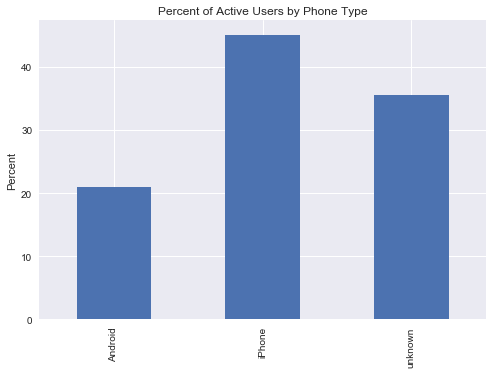

In [67]:
active_by_phone.pct_active.plot(kind='bar', 
                                title='Percent of Active Users by Phone Type')
plt.ylabel('Percent')
plt.xlabel(None)
plt.show()

In [68]:

# compute mean average surge multiplier by active status
ultimate_train.groupby('active')['avg_surge'].mean()

active
0    1.074097
1    1.073370
Name: avg_surge, dtype: float64

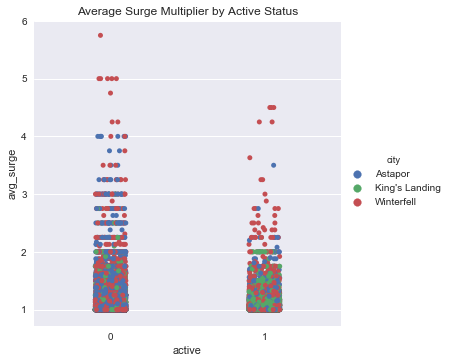

In [69]:

sns.catplot(x='active', y='avg_surge', hue='city', data=ultimate_train)
plt.title('Average Surge Multiplier by Active Status');

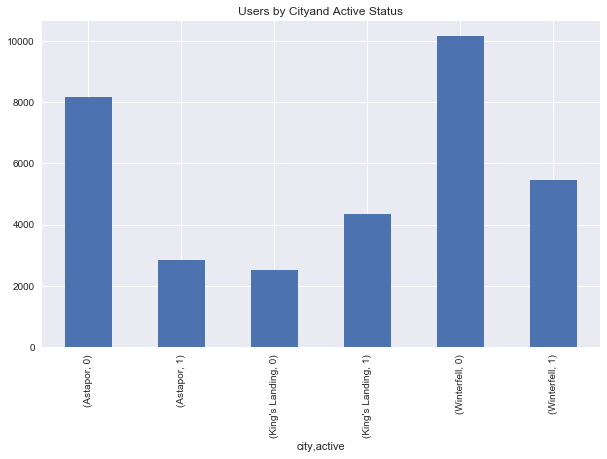

In [70]:

city_active = ultimate_train.groupby(['city','active'])['avg_dist'].count()
city_active.plot(kind = 'bar', title='Users by Cityand Active Status', figsize=(10,6))
plt.show()

In [71]:
city_active = city_active.unstack()
city_active.columns = ['inactive', 'active']
city_active['pct_retained'] = city_active.active / (city_active.active + city_active.inactive)
city_active

,inactive,active,pct_retained
city,,,
Astapor,8179,2853,0.258611
King's Landing,2520,4339,0.632600
Winterfell,10143,5466,0.350183


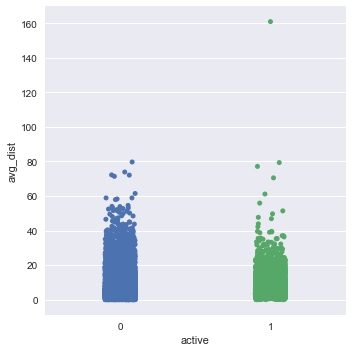

In [72]:
sns.catplot(x='active', y='avg_dist', data=ultimate_train)

In [73]:

ultimate_train.groupby('active')['avg_dist'].mean()

active
0    6.231335
1    5.111653
Name: avg_dist, dtype: float64

In [74]:
ultimate_train.groupby('active')['avg_dist'].std()

active
0    6.222086
1    4.709922
Name: avg_dist, dtype: float64

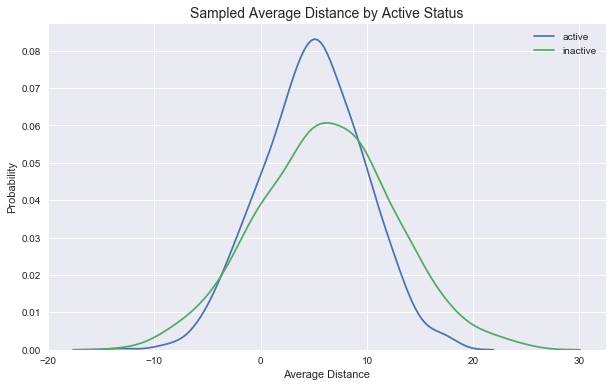

In [75]:
# plot normed distributions of active vs inactive based on avg_dist
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(np.random.normal(5.11, 4.71, 1000), hist=False, label='active', ax=ax)
sns.distplot(np.random.normal(6.23, 6.22, 1000), hist=False, label='inactive', ax=ax)
ax.set_title('Sampled Average Distance by Active Status', fontsize=14)
ax.set_xlabel('Average Distance')
ax.set_ylabel('Probability')
plt.legend()

In [76]:
ultimate_train.groupby('active')['ultimate_black_user'].sum() / ultimate_train.groupby('active')['ultimate_black_user'].count()

active
0    0.297908
1    0.507979
Name: ultimate_black_user, dtype: float64

**Insights**


- iPhone users (45.13%) are retained at a rate twice as high as Android users (20.96%)
- Winterfell experienced the highest surge rate
- 37.79% of users have been retained
- King's Landing (63.3%) had the highest retention percentage followed by Winterfell (35.0%) and Astapor (25.9%)
- Users with average surge rates above 4.5 are unlikely to be retained


### 3.2 Predictive Model
Since we are not dealing with an overly imbalanced dataset, we will first validate our model performance using accuracy on the test set that was set aside. In order to differentiate model performance in later models, we will also calculate a confusion matrix and assess precision and recall scores.

In [77]:
# one-hot encoding for categorical features
ultimate_train = pd.get_dummies(ultimate_train, columns=['city','phone','ultimate_black_user'])
ultimate_test = pd.get_dummies(ultimate_test, columns=['city','phone','ultimate_black_user'])

In [78]:
ultimate_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown,ultimate_black_user_False,ultimate_black_user_True
33553,3.42,4.7,3.8,1.00,2014-06-21,2014-01-10,0.0,1,60.0,1,0,0,1,0,1,0,0,1
9427,3.21,5.0,4.8,1.00,2014-06-17,2014-01-15,0.0,0,75.0,1,1,0,0,0,1,0,0,1
199,4.58,5.0,5.0,1.00,2014-05-16,2014-01-16,0.0,0,100.0,0,0,0,1,0,1,0,1,0
12447,2.94,5.0,5.0,1.50,2014-02-02,2014-01-27,50.0,2,0.0,0,1,0,0,1,0,0,1,0
39489,2.74,4.8,4.8,1.03,2014-05-27,2014-01-05,11.1,0,55.6,0,1,0,0,1,0,0,1,0


In [79]:

# create training data label and feature arrays
y_train = ultimate_train.active.values
X_train = ultimate_train.drop(['last_trip_date', 'active'], axis=1).values

# create test data label and feature arrays
y_test = ultimate_test.active.values
X_test = ultimate_test.drop(['last_trip_date', 'active'], axis=1).values


#### Logistic Regression
Logistic regression will be used as our baseline model as it is computationally inexpensive.

In [80]:
# instantiate classifier
clf = LogisticRegression(solver='liblinear')

# Fit the model on the trainng data.
clf.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(clf.score(X_test, y_test))

0.6275151515151515


Next, we will compare a few ensemble methods as they will likely improve model performace. After computing a baseline score, grid search with cross-validation will be used to optimize hyperparamet tuning.

**AdaBoost**

We will start with the first of the successful ensemble methods as a baseline.

In [81]:
# instantiate classifier
ada = AdaBoostClassifier(random_state=42)

# fit the model
ada.fit(X_train, y_train)

# print the accuracy score
ada.score(X_test, y_test)

0.7853939393939394

In [82]:
# grid search for hyperparameter tuning
ada_param_grids = {'n_estimators':[5, 100, 250],
               'learning_rate':[0.01, 0.1, 1.0]
               }
ada_cv = GridSearchCV(ada, param_grid=ada_param_grids, cv=5)
ada_cv.fit(X_train,y_train)

#print the best model accuracy
print('Best score:{}'.format(ada_cv.best_score_))

# print the best model hyperparameter inputs
print(ada_cv.best_estimator_)

Best score:0.7816119402985074
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=250, random_state=42)


In [186]:
# instantiate new model
ada2 = AdaBoostClassifier(n_estimators=250, random_state=42)

# fit the model
ada2.fit(X_train, y_train)

# print accuracy
ada2.score(X_test, y_test)

0.7868484848484848

In [187]:


# print classification report
ada2_preds = ada2.predict(X_test)
print(classification_report(y_test, ada2_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     10354
           1       0.75      0.65      0.69      6146

    accuracy                           0.79     16500
   macro avg       0.78      0.76      0.77     16500
weighted avg       0.78      0.79      0.78     16500



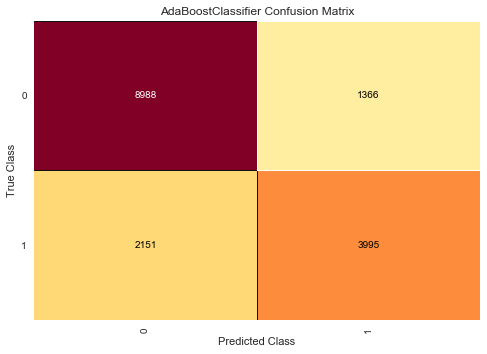

In [188]:
from yellowbrick.classifier import ConfusionMatrix
# create confusion matrix
ada_model = AdaBoostClassifier(n_estimators=250, random_state=42)
ada_cm = ConfusionMatrix(ada_model)
ada_cm.fit(X_train, y_train)
ada_cm.score(X_test, y_test)
ada_cm.poof()

In [189]:
import xgboost as xgb

**Gradient Boosting**

Next, we will move to gradient boosting as we are likely to see improved results.

In [190]:

# instantiate the classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

# print the accuracy score
gbc.score(X_test, y_test)

0.7856363636363637

In [191]:
# Grid search hyperparameters
param_grids = {'max_depth':[3,10,15],
               'n_estimators':[10, 100, 250],
               'subsample':[0.01, 0.1, 1.0],
               'learning_rate':[0.001, 0.01, 0.1]
               }
gbc_cv = GridSearchCV(gbc, param_grid=param_grids, cv = 5)
gbc_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [192]:
# print the best accuracy score from the grid search models
print('Best score:{}'.format(gbc_cv.best_score_))

# print the hyperparameter inputs for the best model
print(gbc_cv.best_estimator_)

Best score:0.7886268656716418
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [193]:
# continue hyperparameter tuning 
gbc_cv = GridSearchCV(gbc, param_grid={'max_depth':[1,3,5], 'n_estimators':[250, 350, 500]}, cv = 5)
gbc_cv.fit(X_train,y_train)
print('Best score:{}'.format(gbc_cv.best_score_))
print(gbc_cv.best_estimator_)

Best score:0.7893731343283582
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [194]:

# final tested gradient boosting model
gbc2 = GradientBoostingClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)
gbc2.score(X_test, y_test)

0.792060606060606

In [195]:
# print classification report
gbc2_preds = gbc2.predict(X_test)
print(classification_report(y_test, gbc2_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     10354
           1       0.75      0.67      0.71      6146

    accuracy                           0.79     16500
   macro avg       0.78      0.77      0.77     16500
weighted avg       0.79      0.79      0.79     16500



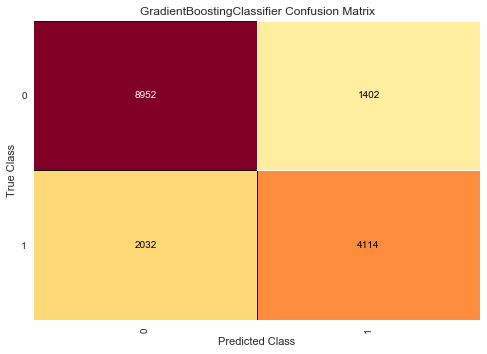

In [196]:
# create confusion matrix
model = GradientBoostingClassifier(n_estimators=500, random_state=42).fit(X_train, y_train)
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

### XGBoost

We will build upon gradient boosting with extreme gradient boosting (XGBoost), which, in addition to potential improved model performance, also has the benefit of increased execution speed (if the model needed to be scaled).

In [197]:
# instantiate the model
matrix = xgb.DMatrix(data=X_train,label=y_train)
xgb_reg = xgb.XGBClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)

# make predictions on test set
xgb_preds = xgb_reg.predict(X_test)

# print classification report
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     10354
           1       0.74      0.67      0.71      6146

    accuracy                           0.79     16500
   macro avg       0.78      0.77      0.77     16500
weighted avg       0.79      0.79      0.79     16500



In [202]:
# print XGBoost accuracy
accuracy_score(y_test, xgb_preds)

0.7921818181818182

In [199]:
# compute grid search
xgb_param_grids = {'max_depth':[3,10,15],
               'n_estimators':[750, 1000, 1250],
               'subsample':[0.5, 1.0]
               }
matrix = xgb.DMatrix(data=X_train,label=y_train)
xgb_reg = xgb.XGBClassifier(num_parallel_trees=-1, random_state=42)
xgb_cv = GridSearchCV(xgb_reg, param_grid=xgb_param_grids, cv = 5)
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_parallel_trees=-1,
                                     objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 10, 15],
                         'n_estimators': [750, 1000, 12

In [200]:
# print best model accuracy and parameters
print('Best score:{}'.format(xgb_cv.best_score_))
print(xgb_cv.best_estimator_)

Best score:0.7893134328358209
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1250, n_jobs=1,
              nthread=None, num_parallel_trees=-1, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1.0, verbosity=1)


In [201]:
# instantiate the model
matrix = xgb.DMatrix(data=X_train,label=y_train)
xgb_reg = xgb.XGBClassifier(n_estimators=1250, random_state=42).fit(X_train, y_train)

# make predictions on test set
xgb_preds = xgb_reg.predict(X_test)

# print XGBoost accuracy
print(accuracy_score(y_test, xgb_preds))

# print classification report
print(classification_report(y_test, xgb_preds))

0.7921818181818182
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     10354
           1       0.75      0.67      0.71      6146

    accuracy                           0.79     16500
   macro avg       0.78      0.77      0.77     16500
weighted avg       0.79      0.79      0.79     16500



xgb_model = xgb.XGBClassifier(n_estimators=1250, random_state=42)
xgb_cm = ConfusionMatrix(xgb_model)
xgb_cm.fit(X_train, y_train)
xgb_cm.score(X_test, y_test)
xgb_cm.poof()

### Conclusion

There are less number of active users in Astapor and Winterfall. This gives insights to Ultimate technologies to do investigation to deterimine root cause of this issue. The XGBoost algorithm produced the best model when validated using accuracy (79.2%), precision (82% of retainment), and recall (67% attrition).The model is able to recall 86% of retained users and 67% of inactive users with a precision of 82% and 75% respectively. This model slightly sacrifices the accuracy of predicting retained users at the expense of more accurately predicting inactive users. Ultimate Technologies could use this model to find trends in attrition by extracting feature importance from the model and using hypothesis testing to confirm correlation. The company could then use the model to 1) identify those customers that were likely to become inactive and provide them with incentive to remain active, and 2) find ways to improve the overall service and retention rate.

